<a href="https://colab.research.google.com/github/seohyun126/DeepLearning-TensorFlow/blob/main/1127_%EB%AA%A8%EB%8D%B8%EC%84%A4%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4 모델 세부 설정
데이터 정규화까지 처리하여 입력 데이터를 준비

87-95, 105-115

In [ ]:
import tensorflow as tf
# 케라스의 내장 데이터 셋에서 mnist 데이터셋 로드하기
mnist=tf.keras.datasets.mnist
# load_data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# 로드된 데이터 셋 확인
print('train set',x_train.shape,y_train.shape)
print('test set',x_test.shape,y_test.shape)
# 데이터 정규화
x_train=x_train/x_train.max() # max:255
x_test=x_test/x_test.max() # max:255

In [ ]:
# 4-1 초기값 설정
dense=tf.keras.layers.Dense(256,activation='relu')
# dense 레이어는 기본 초기화 방법으로 glorot uniform 초기화 방법이 설정되어 있음
# 이를 henoraml로 변경하기 위해서는 kernel_initializer 매개변수 설정하면 됨
dense.get_config()['kernel_initializer']
# 문자열 초기화
dense=tf.keras.layers.Dense(256,kernel_initializer='he_normal',activation='relu')
print(dense.get_config()['kernel_initializer'])
# 클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense=tf.keras.layers.Dense(256,kernel_initializer=he_normal,activation='relu')
print(dense.get_config()['kernel_initializer'])

In [ ]:
# 4-2 규제
# 모델의 과대적합을 해소하기 위해 l1,l2 규제를 적용
# 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않음
# 기본값
dense=tf.keras.layers.Dense(256,activation='relu')
dense.get_config()

In [ ]:
# l2 규제 적용
dense=tf.keras.layers.Dense(256,kernel_regularizer='l1',activation='relu')
print(dense.get_config()['kernel_regularizer'])
# 클래스 인스턴스 적용. alpha=0.1 변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256,kernel_regularizer=regularizer,activation='relu')
print(dense.get_config()['kernel_regularizer'])

In [ ]:
# 4-3 드롭아웃
# 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련 -> 과대적합 방지
# 예측 시점에서는 모든 노드들이 활용됨
# Dropout 25% 비율 적용
tf.keras.layers.Dropout(0.25)

In [ ]:
# 4-4 배치 정규화
# 각 층에서 활성화 함수를 통과하기 전 미니 배치 스케일을 정규화
# 다음 층으로 데이터가 전달되기 전에 스케일을 조정하여 성능 향상
# model_a: Dense+ReLu
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_a.summary()

In [ ]:
# model_b: Dense+BatchNorm+ReLu
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 이후 활성화 함수 이용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 이후 활성화 함수 이용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_b.summary()

In [ ]:
# 4-5 활성화함수
# dense레이어에서는 주로 relu 지정
# 활성화함수 적용할 때, 클래스 인스턴스로 선언하여 하이퍼파라미터값을 변경하여 사용
# LeakyReLu 기본 설정
tf.keras.layers.LeakyReLU()
# LeakyReLu alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [9]:
# model_c: Dense+BatchNorm+LeakyReLu alpha=0.2
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 이후 활성화 함수 이용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 이후 활성화 함수 이용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2893 - accuracy: 0.9160 - val_loss: 0.1625 - val_accuracy: 0.9507
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1362 - accuracy: 0.9601 - val_loss: 0.1251 - val_accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0988 - accuracy: 0.9701 - val_loss: 0.0998 - val_accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0781 - accuracy: 0.9753 - val_loss: 0.0989 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.0889 - val_accuracy: 0.9730
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9832 - val_loss: 0.0890 - val_accuracy: 0.9720
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0832 - val_accuracy:

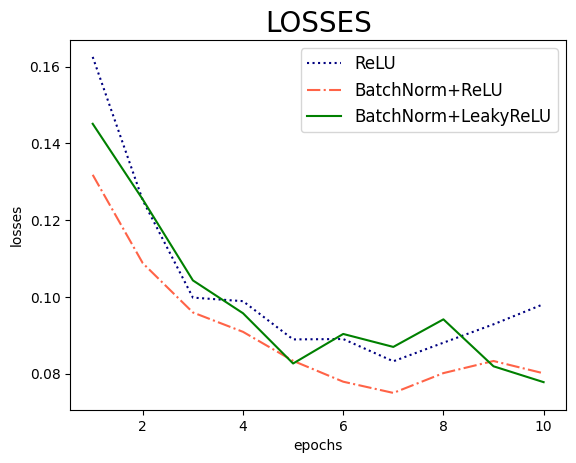

In [10]:
# 총 3개의 모델 수렴 속도 확인
model_a.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_b.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_c.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model_a: Dense+ReLu
history_a=model_a.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
# model_b: Dense+BatchNorm+ReLu
history_b=model_b.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
# model_c: Dense+BatchNorm+LeakyReLu alpha=0.2
history_c=model_c.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1,11),history_a.history['val_loss'],color='navy',linestyle=':')
plt.plot(np.arange(1,11),history_b.history['val_loss'],color='tomato',linestyle='-.')
plt.plot(np.arange(1,11),history_c.history['val_loss'],color='green',linestyle='-')

plt.title('LOSSES',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['ReLU','BatchNorm+ReLU','BatchNorm+LeakyReLU'],fontsize=12)
plt.show()


## 6 모델 저장 및 불러오기

In [11]:
# 6-1 모델을 파일로 저장
# HDF5 포맷과 SavedModel 포맷 이렇게 두가지가 있음
# HDF5는 대용량의 데이터를 저장하기 위한 파일 형식임
model_c.save('h5-model.h5')
# 6-2 저장된 모델 복원
h5_model=tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 53034 (207.16 KB)
Trainable params: 52842 (206.41 KB)
Non-trainable params: 192 (768.00 Byte)
_________________________________________________________________


In [12]:
# 모델 검증
loss,acc=h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model] loss:{loss:.5f}.acc:{acc:.5f}')

h5 model] loss:0.07777.acc:0.97770


In [13]:
# 모델을 SavedModel 포맷으로 저장
model_c.save('saved-model')

In [14]:
# 모델 복원
saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [15]:
# 모델 검증(HDF5 포맷)
loss,acc=h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model] loss:{loss:.5f}.acc:{acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss,acc=saved_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model] loss:{loss:.5f}.acc:{acc:.5f}')

h5 model] loss:0.07777.acc:0.97770
h5 model] loss:0.07777.acc:0.97770


## 7 복잡한 모델 생성
## 7-1 함수형 API(Functional API)
여러 층을 시퀀스 형태로 연결하는 Sequential API와 다르게 Functional API는 복잡한 구조의 모델을 정의할 수 있음.

In [16]:
# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist
# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()
# Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
# 모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer=tf.keras.Input(shape=(28,28),name='InputLayer')
# 모델 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256,activation='relu',name='Dense1')(x1)
x3=tf.keras.layers.Dense(64,activation='relu',name='Dense2')(x2)
x4=tf.keras.layers.Dense(10,activation='softmax',name='Dense3')(x3)
# 레이어마다 name 매개변수로 이름 부여 가능
# 모델 인스턴스에 대해 summary로 요약 출력할 때 이름이 함께 출력됨
# 이렇게 체인 방식으로 연결한 후 tf.keras.Model에 입력 레이어와 출력 레이어를 정의해 모델 생성
# 모델 생성
func_model=tf.keras.Model(inputs=input_layer,outputs=x4,name='FunctionalModel')
# 모델 오약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 Dense3 (Dense)              (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


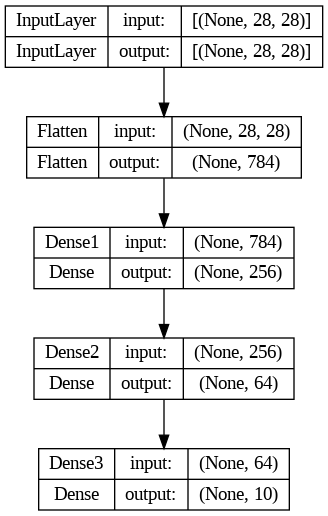

In [17]:
from tensorflow.keras.utils import plot_model
# 구조도 시각화
plot_model(func_model,show_shapes=True,show_layer_names=True,to_file='model.png')

In [18]:
# 함수형 API로 생성한 모델도 Sequential API로 생성한 모델과 동일한 방식으로 훈련할 수 있음
# 생성한 모델 인스턴스에 compile 매서드로 모델을 컴파일하고 fit 매서드로 모델을 훈련함
# 훈련이 완료된 뒤 evaluate 매서드로 검증해야 함
# 컴파일
func_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
# 훈련
func_model.fit(x_train,y_train,epochs=3)
# 검증
loss,acc=func_model.evaluate(x_test,y_test,verbose=0)
print(f'Functional Model]loss:{loss:.5f},acc:{acc:.5f}')


Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2154 - accuracy: 0.9356
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0879 - accuracy: 0.9724
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0599 - accuracy: 0.9802
Functional Model]loss:0.08202,acc:0.97430


In [24]:
# 7-2 모델 서브 클래싱
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel,self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256,activation='relu')
    self.dense2=tf.keras.layers.Dense(64,activation='relu')
    self.dense3=tf.keras.layers.Dense(10,activation='softmax')
    # method overiding
    # 훈련용 함수 정의
    # x는 input
  def call(self,x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [25]:
# 모델 생성
mymodel=MyModel()
# 모델의 이름 설정
mymodel._name='subclass_model'
# 모델의 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))
# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         multiple                  0         
                                                                 
 dense_31 (Dense)            multiple                  200960    
                                                                 
 dense_32 (Dense)            multiple                  16448     
                                                                 
 dense_33 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# 컴파일
mymodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
# 훈련
mymodel.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0192
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0156
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0131


In [36]:
# 검증
loss=mymodel.evaluate(x_test,y_test,verbose=0)
print(f'Subclassing Mdoel]loss:{loss:.5f}')

Subclassing Mdoel]loss:0.09980


In [30]:
# 7-3 서브클래싱 모델 파라미터를 활용한 생성
class MyModel(tf.keras.Model):
  # 생성자 파라미터 추가
  def __init__(self,units,num_classes):
    super(MyModel,self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units,activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4,activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes,activation='softmax')
    # method overiding
    # 훈련용 함수 정의
    # x는 input
  def call(self,x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [37]:
# 모델 생성
mymodel=MyModel(256,10)
# 모델의 이름 설정
mymodel._name='subclass_model'
# 모델의 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))
# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         multiple                  0         
                                                                 
 dense_34 (Dense)            multiple                  200960    
                                                                 
 dense_35 (Dense)            multiple                  16448     
                                                                 
 dense_36 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# 컴파일
mymodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 훈련
mymodel.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2122 - accuracy: 0.9375
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0878 - accuracy: 0.9725
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0589 - accuracy: 0.9814


In [41]:
# 검증
loss,acc=mymodel.evaluate(x_test,y_test,verbose=0)
print(f'Subclassing Model]loss:{loss:.5f},acc:{acc:.5f}')

Subclassing Model]loss:0.07856,acc:0.97610
